In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
deprem = pd.read_csv('data.csv', parse_dates=['Date'], infer_datetime_format=True)
deprem

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0      2023-02-18 09:39:08     35.459    37.717   7.00  0.45   ML        1.9   
1      2023-02-18 09:33:16     36.353    38.229  12.26  0.56   ML        3.1   
2      2023-02-18 09:25:51     36.592    38.109   7.38  0.55   ML        2.3   
3      2023-02-18 09:25:03     42.035    40.534   7.00  0.37   ML        1.4   
4      2023-02-18 09:22:26     38.362    38.340   7.00  0.28   ML        2.1   
...                    ...        ...       ...    ...   ...  ...        ...   
405647 1990-02-24 00:41:40     31.000    41.000   3.00  0.00   Md        3.0   
405648 1990-02-23 01:28:53     30.000    41.000   7.00  0.00   Md        3.0   
405649 1990-02-23 00:38:27     30.000    41.000   7.00  0.00   Md        3.0   
405650 1990-02-20 00:38:27     30.280    40.710   7.00  0.00   Md        2.6   
405651 1990-02-17 13:30:22     30.000    41.000   1.00  0.00   Md        3.0   

                                           Location  EventID  
0                                    Aladağ (Adana)   549765  
1                                Tufanbeyli (Adana)   549757  
2                            Göksun (Kahramanmaraş)   549764  
3                                    Oltu (Erzurum)   549759  
4                              Battalgazi (Malatya)   549762  
...                                             ...      ...  
405647                             Akçakoca (Düzce)   238001  
405648                            Kandıra (Kocaeli)   238000  
405649                            Kandıra (Kocaeli)   237999  
405650  Sapanca Gölü - [01.83 km] Sapanca (Sakarya)   237998  
405651                            Kandıra (Kocaeli)   237997  

[405652 rows x 9 columns]

In [28]:
deprem.dtypes

Date         datetime64[ns]
Longitude           float64
Latitude            float64
Depth               float64
Rms                 float64
Type                 object
Magnitude           float64
Location             object
EventID               int64
dtype: object

In [29]:
import folium
import pandas as pd
import time

dat = pd.read_csv('data.csv', parse_dates=['Date'], infer_datetime_format=True)
data = dat.loc[0:1000,:]

m = folium.Map(location=[38.963745, 35.243320], zoom_start=5)

for index, row in data.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'] * 100,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m


In [30]:
import folium
import pandas as pd
from folium.plugins import TimestampedGeoJson
import matplotlib.cm as cm
import matplotlib.colors as colors

In [31]:
from folium.features import DivIcon


def create_geojson_features(df):
    cmap = cm.get_cmap('viridis')
    norm = colors.Normalize(vmin=0, vmax=df['Magnitude'].max())
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row['Longitude'], row['Latitude']],

            },
            'properties': {
                'time': row['Date'].isoformat(),
                'mag': row['Magnitude'],
                'icon': 'circle', 
                'iconstyle': {'radius': row['radius'],
                              'color': colors.rgb2hex(cmap(norm(row['Magnitude'])))
                              },        
            },
        }
        features.append(feature)
    return features

In [32]:
eq_data = pd.read_csv('data.csv', parse_dates=['Date'], infer_datetime_format=True)
eq_data['radius'] = 10**(eq_data['Magnitude']*1/2)
eq_data['energy'] = 10**(eq_data['Magnitude']*3/2)

eq_data['radius'] = eq_data['radius']/eq_data['radius'].max()*80

temp = eq_data.iloc[1:,0]
temp

1        2023-02-18 09:33:16
2        2023-02-18 09:25:51
3        2023-02-18 09:25:03
4        2023-02-18 09:22:26
5        2023-02-18 09:20:52
                 ...        
405647   1990-02-24 00:41:40
405648   1990-02-23 01:28:53
405649   1990-02-23 00:38:27
405650   1990-02-20 00:38:27
405651   1990-02-17 13:30:22
Name: Date, Length: 405651, dtype: datetime64[ns]

In [301]:

#data = eq_data.loc[0:10000,:]
data = eq_data.loc[400000:404000,:]


eq_data[eq_data.Date.dt.year > 2000]

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0      2023-02-18 09:39:08     35.459    37.717   7.00  0.45   ML        1.9   
1      2023-02-18 09:33:16     36.353    38.229  12.26  0.56   ML        3.1   
2      2023-02-18 09:25:51     36.592    38.109   7.38  0.55   ML        2.3   
3      2023-02-18 09:25:03     42.035    40.534   7.00  0.37   ML        1.4   
4      2023-02-18 09:22:26     38.362    38.340   7.00  0.28   ML        2.1   
...                    ...        ...       ...    ...   ...  ...        ...   
400038 2001-01-03 22:06:39     32.980    40.640  10.60  0.00   Md        3.4   
400039 2001-01-02 05:10:25     33.050    40.790  10.70  0.00   Md        3.0   
400040 2001-01-01 17:05:20     29.010    40.800   3.40  0.00   Md        2.7   
400041 2001-01-01 17:00:12     31.210    38.480  10.60  0.00   Md        2.6   
400042 2001-01-01 14:07:12     33.010    40.660  11.40  0.00   Md        3.0   

                                             Location  EventID    radius  \
0                                      Aladağ (Adana)   549765  0.100714   
1                                  Tufanbeyli (Adana)   549757  0.400950   
2                              Göksun (Kahramanmaraş)   549764  0.159621   
3                                      Oltu (Erzurum)   549759  0.056636   
4                                Battalgazi (Malatya)   549762  0.126791   
...                                               ...      ...       ...   
400038                                 Orta (Çankırı)   243066  0.566357   
400039                               Çerkeş (Çankırı)   243065  0.357347   
400040  Marmara Denizi - [07.38 km] Adalar (İstanbul)   243064  0.252982   
400041                    Sultandağı (Afyonkarahisar)   243063  0.225471   
400042                                 Orta (Çankırı)   243062  0.357347   

               energy  
0          707.945784  
1        44668.359215  
2         2818.382931  
3          125.892541  
4         1412.537545  
...               ...  
400038  125892.541179  
400039   31622.776602  
400040   11220.184543  
400041    7943.282347  
400042   31622.776602  

[400043 rows x 11 columns]

In [285]:

geojson_data = {
    'type': 'FeatureCollection',
    'features': create_geojson_features(data)
}


m = folium.Map(location=[38.963745, 35.243320], zoom_start=6)


TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': geojson_data['features']},
    period='P1M',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    time_slider_drag_update=True,
    duration='P12M',
    transition_time=100,
).add_to(m)

m

In [290]:
data = eq_data.loc[:10000,:]


data

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0     2023-02-18 09:39:08     35.459    37.717   7.00  0.45   ML        1.9   
1     2023-02-18 09:33:16     36.353    38.229  12.26  0.56   ML        3.1   
2     2023-02-18 09:25:51     36.592    38.109   7.38  0.55   ML        2.3   
3     2023-02-18 09:25:03     42.035    40.534   7.00  0.37   ML        1.4   
4     2023-02-18 09:22:26     38.362    38.340   7.00  0.28   ML        2.1   
...                   ...        ...       ...    ...   ...  ...        ...   
9996  2022-12-30 04:17:13     27.210    38.335   9.73  0.24   ML        1.4   
9997  2022-12-30 03:57:35     27.223    38.339   8.85  0.43   ML        2.0   
9998  2022-12-30 03:24:36     27.226    38.339   7.77  0.65   ML        1.0   
9999  2022-12-30 03:21:42     28.415    37.085   5.28  0.66   ML        2.0   
10000 2022-12-30 02:58:37     30.707    37.597   8.84  0.61   ML        1.9   

                     Location  EventID    radius  
0              Aladağ (Adana)   549765  0.088125  
1          Tufanbeyli (Adana)   549757  0.350831  
2      Göksun (Kahramanmaraş)   549764  0.139668  
3              Oltu (Erzurum)   549759  0.049556  
4        Battalgazi (Malatya)   549762  0.110943  
...                       ...      ...       ...  
9996             Buca (İzmir)   539700  0.049556  
9997             Buca (İzmir)   539699  0.098878  
9998             Buca (İzmir)   539698  0.031268  
9999              Ula (Muğla)   539697  0.098878  
10000        Ağlasun (Burdur)   539696  0.088125  

[10001 rows x 10 columns]

In [291]:
geojson_data = {
    'type': 'FeatureCollection',
    'features': create_geojson_features(data)
}


m = folium.Map(location=[38.963745, 35.243320], zoom_start=6)


TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': geojson_data['features']},
    period='PT1H',
    add_last_point=False,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    time_slider_drag_update=True,
    duration='P1D',
    transition_time=100,
).add_to(m)

m

**Benford's Law**

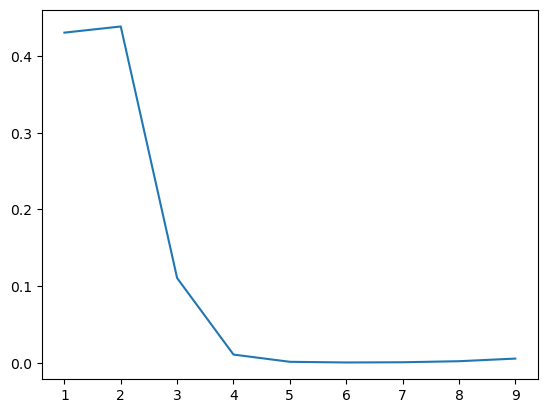

In [292]:
datt = eq_data[eq_data.Magnitude != 0]
mags = datt[['Magnitude']]*10
mags[mags.Magnitude < 10] = mags[mags.Magnitude < 10]*10
mags = mags[['Magnitude']]//10

mags = mags.astype('int')

ss = [s for s in [mags[mags.Magnitude == i].size for i in range(1,10)]]
ss = ss / np.sum(ss)
plt.plot([i for i in range(1,10)],ss)

In [ ]:
import seaborn as sns

sns.histplot(data=dat['Latitude'])


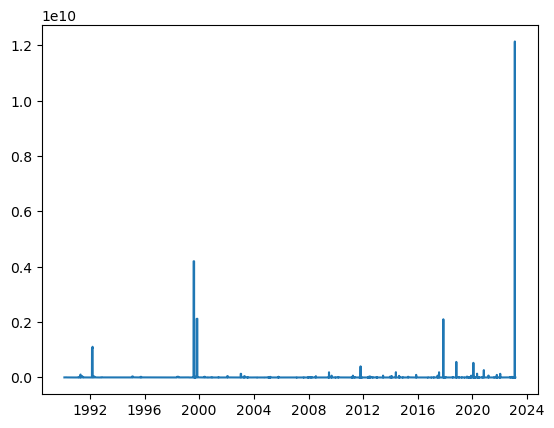

In [303]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

magnitudes = np.array(eq_data['energy'].values)
avg_cum_sum = np.array([np.sum(magnitudes[i:i+30]) for i in range(len(magnitudes)-30)]) / 30
avg_cum_sum
#[magnitudes[i:i+30] for i in range(len(magnitudes)-30)]
dat.iloc[30:,:]['Date']

#len(avg_cum_sum)

plt.plot(eq_data.iloc[30:,:]['Date'], avg_cum_sum)
plt.show()


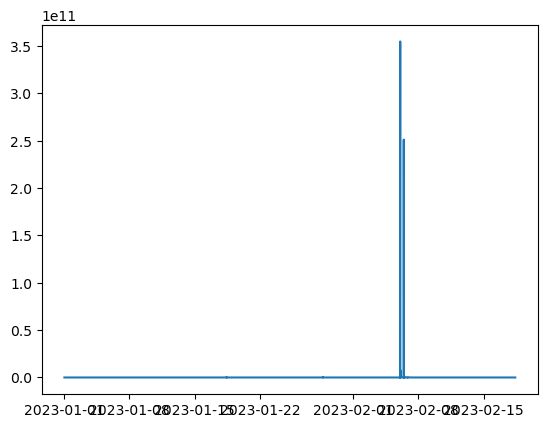

In [310]:
plt.plot(eq_data.loc[eq_data['Date'].dt.year > 2022, 'Date'], eq_data.loc[eq_data['Date'].dt.year > 2022, 'energy'])
plt.show()

In [51]:
data = eq_data.loc[eq_data['Date'].dt.year > 2022, 'energy'].values
data

array([7.07945784e+02, 4.46683592e+04, 2.81838293e+03, ...,
       4.46683592e+01, 3.54813389e+02, 4.46683592e+01])

In [34]:
import numpy as np
from music21 import *
from IPython.display import display


def map_to_pitch(x, min_x, max_x, min_pitch, max_pitch):
    pitch_range = max_pitch - min_pitch
    value_range = max_x - min_x
    normalized_value = (x - min_x) / value_range
    pitch = int(round(min_pitch + normalized_value * pitch_range))
    return pitch

In [9]:
def create_music_from_array(data, duration=0.5, tempo='60'):
    # Define pitch mapping parameters
    min_pitch = 60  # C4
    max_pitch = 72  # C5
    min_data = min(data)
    max_data = max(data)
    # Create music stream object
    music = stream.Score()
    part = stream.Part()
    music.append(part)
    # Set tempo
    part.append(tempo.MetronomeMark(number=int(tempo)))
    # Add notes corresponding to the values in the array
    for value in data:
        pitch = int(round(map_to_pitch(value, min_data, max_data, min_pitch, max_pitch)))
        note = note.Note()
        note.pitch.midi = pitch
        note.duration.quarterLength = duration
        part.append(note)
    return music

In [10]:
def play_music(music):
    music.show('midi')

In [11]:
def play_music_in_notebook(data, duration=0.5, tempo=60):
    music = create_music_from_array(data, duration, tempo)
    play_music(music)
    display(music21.midi.translate.streamToMidiFile(music))

In [12]:
data = [0.5, 0.7, 0.3, 0.9, 0.6]
play_music_in_notebook(data)

AttributeError: 'int' object has no attribute 'MetronomeMark'

In [13]:
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()



SubConverterException: Cannot find a path to the 'mscore' file at /Applications/MuseScore 3.app/Contents/MacOS/mscore -- download MuseScore

In [14]:
import music21
music21.configure.run()


______________________________________________________________________________ 
  
Welcome to the music21 Configuration Assistant. You will be guided through a 
number of questions to install and set up music21. Simply pressing return at a 
prompt will select a default, if available. 

You may run this configuration again at a later time by running 
music21/configure.py. 
  
______________________________________________________________________________ 
  
Defining an XML Reader permits automatically opening music21-generated 
MusicXML in an editor for display and manipulation when calling the show() 
method. Setting this option is highly recommended. 
  
[1] /Applications/MuseScore 4.app 
  
Choose a number from the preceding options (default is 1): 

 1



MusicXML Reader set to: /Applications/MuseScore 4.app 
  
______________________________________________________________________________ 
  
The BSD-licensed music21 software is distributed with a corpus of encoded 
compositions which are distributed with the permission of the encoders (and, 
where needed, the composers or arrangers) and where permitted under United 
States copyright law. Some encodings included in the corpus may not be used 
for commercial uses or have other restrictions: please see the licenses 
embedded in individual compositions or directories for more details. 
  
In addition to the corpus distributed with music21, other pieces are not 
included in this distribution, but are indexed as links to other web sites 
where they can be downloaded (the "virtual corpus"). If you would like, 
music21 can help your computer automatically resolve these links and bring 
them to your hard drive for analysis. 
To the best of our knowledge, the music (if not the encodings) in th

 1



Auto Download set to: allow 
  
______________________________________________________________________________ 
  
Would you like to send a pre-formatted email to music21 regarding your 
installation? Installation reports help us make music21 work better for you: 
Enter Yes or No (default is Yes): 

 No



______________________________________________________________________________ 
  
The music21 discussion group provides a forum for asking questions and getting 
help. Would you like to see the music21 discussion list or sign up for 
updates? Enter Yes or No (default is Yes): 

 No



______________________________________________________________________________ 
  
Would you like to view the music21 documentation in a web browser? Enter Yes 
or No (default is Yes): 

 No



______________________________________________________________________________ 
  
The music21 Configuration Assistant is complete. Press return to continue. 

In [16]:
from music21 import *


In [17]:
s = corpus.parse('bach/bwv65.2.xml')


In [18]:
s.analyze('key')


<music21.key.Key of a minor>

In [20]:
s.show()


SubConverterException: Cannot find a path to the 'mscore' file at /Applications/MuseScore 3.app/Contents/MacOS/mscore -- download MuseScore

In [21]:
import numpy as np
from scipy.io.wavfile import write

rate = 44100
data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
write('test.wav', rate, scaled)

In [46]:
from IPython.display import Audio
import numpy
wave_audio = numpy.sin(numpy.linspace(0, 2*np.pi*1000, 100000))
Audio(wave_audio,  rate=44100)

In [53]:
from IPython.display import Audio
import numpy as np
from IPython.display import display

def play_sound_from_wavelengths(wavelengths, amplitude=0.5, duration=1.0, sample_rate=44100):
    # Define pitch mapping parameters
    min_pitch = 70  # C4
    max_pitch = 72  # C5
    min_wavelength = min(wavelengths)
    max_wavelength = max(wavelengths)
    # Create time array
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    # Generate sine wave for each wavelength
    wave_audio = np.zeros_like(t)
    for wavelength in wavelengths:
        frequency = 1 / wavelength
        pitch = int(round(map_to_pitch(wavelength, min_wavelength, max_wavelength, min_pitch, max_pitch)))
        wave = amplitude * np.sin(2 * np.pi * frequency * t)
        wave_audio += wave
    # Normalize audio
    wave_audio /= np.max(np.abs(wave_audio))
    # Play audio
    display(Audio(wave_audio, rate=sample_rate))

In [55]:
wave_audio = numpy.sin(numpy.linspace(0, 3000, 20000))
wavelengths = [1.0, 0.5, 2.0, 1.5]

play_sound_from_wavelengths(wave_audio, amplitude=0.5, duration=2.0, sample_rate=44100)

/var/folders/p1/mbkl10792jz1k5zgkw1zd_mh0000gn/T/ipykernel_41666/1777824528.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  frequency = 1 / wavelength
/var/folders/p1/mbkl10792jz1k5zgkw1zd_mh0000gn/T/ipykernel_41666/1777824528.py:18: RuntimeWarning: invalid value encountered in multiply
  wave = amplitude * np.sin(2 * np.pi * frequency * t)
/var/folders/p1/mbkl10792jz1k5zgkw1zd_mh0000gn/T/ipykernel_41666/1777824528.py:18: RuntimeWarning: invalid value encountered in sin
  wave = amplitude * np.sin(2 * np.pi * frequency * t)


In [39]:
Audio(wave_audio, rate=44100)